# Vidic, Fajfar and Fischinger  (1994)

This procedure aims to determine the displacements from an inelastic design spectra for systems with a given ductility factor. The inelastic displacement spectra is determined by means of applying a reduction factor, which depends on the natural period of the system, its ductility factor, the hysteretic behaviour, the damping, and the frequency content of the ground motion.

##Load capacity curves

In order to use this methodology, it is necessary to provide one (or a group) of capacity curves, defined according to the format established on the [RMTK manual](../../../../../rmtk-docs.pdf). Please provide the location of the folder containing this input using the parameter input_folder.

In [1]:
from rmtk.vulnerability.common import utils
%matplotlib inline 

capacity_curves_file = '../../../../../../rmtk_data/capacity_curves_Sa-Sd.csv'
capacity_curves = utils.read_capacity_curves(capacity_curves_file)
#utils.plot_capacity_curves(capacity_curves)

## Load ground motion records


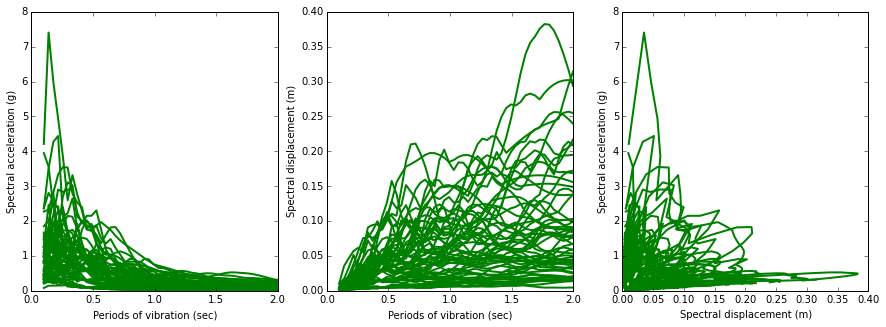

In [3]:
gmrs_folder = '../../../../../../rmtk_data/accelerograms'
gmrs = utils.read_gmrs(gmrs_folder)
minT = 0.1
maxT = 2
utils.plot_response_spectra(gmrs,minT,maxT)

##Calculate fragility function


In [3]:
import vidic_etal_1994

damage_model = utils.read_damage_model('../../../../../../rmtk_data/damage_model.csv')
damping = 0.05
hysteresis_model = 'Q'
damping_model = 'mass'
PDM, Sds = vidic_etal_1994.calculate_fragility(capacity_curves,gmrs,damage_model,damping,hysteresis_model,damping_model)

T = 2.0
regression_method = 'least squares'
fragility_model = utils.calculate_mean_fragility(gmrs,PDM,T,damping,'Sa',damage_model,regression_method)
utils.plot_fragility_model(fragility_model,0.01,2)

5%
10%


KeyboardInterrupt: 